## Introduction

Folks, let's work backwards from our deadline and see what needs to be done:

week 14: Need to have all of this done including presentation etc

week 13: By this time, we should be done with all ML models and have results

week 12: Finalize all models and features

week 11: EDA complete and Features identified


It seems like we don't have much time given we are in week 10 now. We need to divvy up the work well and for that, we need to figure out what all needs to be done. Let's spend the next couple of days filling up all the tasks in the sections below. And see how we can knock them off after dividing them up. BTW, feel free to suggest better ways of doing things, and as well, make sure that you get what you want out of this project. My own goal here is to do some amount of decent coding and analysis, and as well do something akin to product management :-)

## Exploratory Data Analysis
Let's list all tasks in some detail here. Feel free to add/delete/modify. I am taking a first stab at it. Aditi/Sid - please add

### Data cleansing tasks
1. Clean up NANs
2. Remove duplicates
3. Other?

### Univariate/Bivariate analysis
In each case revenue vs the independent variable. Perhaps we also comment on independent variable as well as needed. Some of these are obvious, but we need to break down the tasks amongst us, and hence the detail.
1. Revenue vs Budget
2. Rev vs Directors
3. Rev vs Actors
4. Rev vs Director movie frequency
5. Rev vs Actor movie frequency
6. Rev vs Language
7. Rev vs Popularity
8. Rev vs Series/non-series (ex: Indiana Jones)
9. Rev vs Genre
10. Rev vs time of release (Xmas, Thanksgiving etc)
11. Rev vs Runtime
12. Rev vs Number of countries released in

### Transformations
Do we need to transform any of the variables. There will be work involved here and we need to divvy up. Some of this is tied to earlier work, so perhaps this will come about naturally
1. Crew -> need to parse and more
2. Timeline of release -> weeks, holidays etc
3. Genre
4. Series
5. Any ratio that we can think of?


## Feature Engineering
What features to finally  use. I think this is just a summary after we have achieved the transformations and finished the univariable/bivariate analysis?
Target: Revenue
Inputs:
1. Budget
2. Director/Director_frequency
3. Producer/Producer_Frequency
4. Actor/Actor_Frequency
5. Genre
6. Timeline of release
7. Language (English/other)
8. Popularity
9. Runtime
10. #Countries
11. Series number (if part of series)
12. Others? Like macro-economic conditions: NASDAQ or S&P index


## Machine Learning Models
Each of us takes one on, and another person helps?
1. Linear Regression
2. Multinomial NB???
3. Neural Networks

## Results

## Conclusions and Future Work

### Packages used :

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
#from tqdm import tqdm
from datetime import datetime
import json
from sklearn.preprocessing import LabelEncoder
#warnings.filterwarnings("ignore")
from ast import literal_eval
from wordcloud import WordCloud
import itertools

In [105]:
def get_dictionary(s):
    try:
        d = literal_eval(s)
    except:
        d = {}
    return d

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [112]:
train.head()


,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,director
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Steve Pink]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,[Garry Marshall]
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Damien Chazelle]
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,[Sujoy Ghosh]
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,[Jong-seok Yoon]
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,Pinocchio and the Emperor of the Night,0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,[Hal Sutherland]
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",en,The Possession,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,[Ole Bornedal]
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",en,Control Room,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,NaN,NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,[Jehane Noujaim]
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",en,Muppet Treasure Island,6.902423,/5A8gKzOrF9Z7tS

In [20]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [85]:
np.unique(train['status'],return_counts=True)


(array(['Released', 'Rumored'], dtype=object),
 array([2996,    4], dtype=int64))

In [60]:
sns.relplot(x="budget", y="revenue", data=train, height=11, color="g")
plt.show()

AttributeError: module 'seaborn' has no attribute 'relplot'

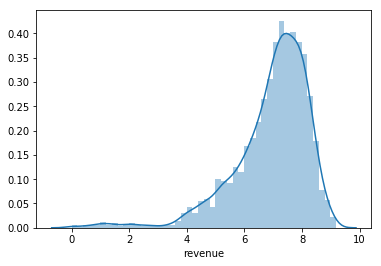

In [22]:
sns.distplot(np.log10(train['revenue']))
plt.show()

In [86]:
#for i,j in enumerate(train['crew'][:5]):
#    print(i,j)

In [87]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)


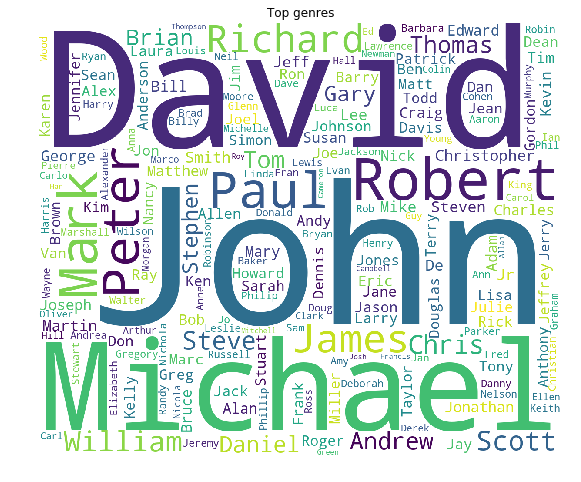

In [67]:
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_crew_names for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

In [16]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(get_dictionary(x)) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [69]:
train['director'] = train['crew'].apply(lambda x: [i['name'] for i in get_dictionary(x) if i['job'] == 'Director'])

In [70]:
print (train['director'][:5])

0         [Steve Pink]
1     [Garry Marshall]
2    [Damien Chazelle]
3        [Sujoy Ghosh]
4     [Jong-seok Yoon]
Name: director, dtype: object


In [73]:
from collections import Counter
dir_list = train['director'].tolist()
Counter(dir_list[:5])


TypeError: unhashable type: 'list'

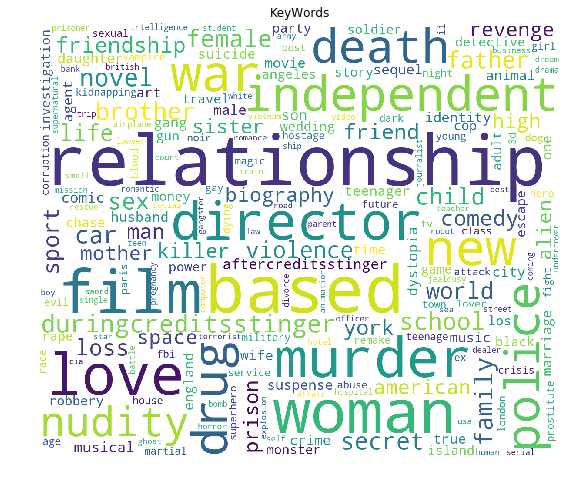

In [83]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('KeyWords')
plt.axis("off")
plt.show()

In [117]:
clean_train = train
clean_train=clean_train.drop(columns=['homepage','imdb_id','tagline','overview','belongs_to_collection'])
clean_train['collection'] = list(train['belongs_to_collection'].apply(lambda x: [i['name'] for i in get_dictionary(x)] if x != {} else []).values)
clean_train.head()

,id,budget,genres,original_language,original_title,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,director,collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,[Steve Pink],[Hot Tub Time Machine Collection]
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,[Garry Marshall],[The Princess Diaries Collection]
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,[Damien Chazelle],[]
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,[Sujoy Ghosh],[]
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,[Jong-seok Yoon],[]
